In [1]:
# Importing the necessary dependency libraries
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import shap
import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
# Define model performance test functions
def mlperformance(rf, xtrain_up, ytrain_up, x_train, y_train):
    # fit modle
    rf.fit(xtrain_up, ytrain_up);
    # AUC
    auc_scores = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    print('auc = ', "%.3f"%auc_scores)
    # accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_train, rf.predict(x_train))*100
    print('accuracy = ', "%.1f"%accuracy)
    print('------------------------')
    # Confusion matrix
    import sklearn.metrics as sm
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(y_train, rf.predict(x_train), labels=None, sample_weight=None)
    print('混淆矩阵为：')
    print(matrix)
    (tn,fp,fn,tp) = matrix.ravel()
    print('tn=',tn)
    print('fp=',fp)
    print('fn=',fn)
    print('tp=',tp)
    print('------------------------')
    sensitivity = (tp/(tp+fn))*100
    specificity = (tn/(fp+tn))*100
    PPV=tp/(tp+fp)*100
    NPV=tn/(fn+tn)*100
    print(f'PPV = {"%.1f"%PPV}\n({tp}/{(tp+fp)})')
    print(f'NPV = {"%.1f"%NPV}\n({tn}/{(fn+tn)})')
    print(f'sensitivity = {"%.1f"%sensitivity}\n({tp}/{(tp+fn)})')
    print(f'specificity = {"%.1f"%specificity}\n({tn}/{(fp+tn)})')

In [3]:
# Reading data
train = pd.read_csv('F:/Onedrive/JIMMY/Python/Notebook/data_set/inuse/train.csv',encoding='gbk')
test = pd.read_csv('F:/Onedrive/JIMMY/Python/Notebook/data_set/inuse/test.csv',encoding='gbk')

xtrain = train.iloc[:,1:15]
xtest = test.iloc[:,1:15]
ytrain = train.iloc[:,-1]
ytest = test.iloc[:,-1]

# Up-sampling processing
sm = SMOTE(sampling_strategy={1: 1500},random_state=100) 
xtrainup,ytrainup = sm.fit_resample(xtrain,ytrain)

In [4]:
# Model Instantiation
rf = RandomForestClassifier(n_estimators=64, random_state=63, n_jobs=-1
                           ,max_depth=6
                           ,min_samples_leaf=1
                           ,min_samples_split=2
                           ,max_features=3)

In [5]:
# Testing the model on the training set
mlperformance(rf, xtrainup, ytrainup, xtrain, ytrain)

auc =  0.967
accuracy =  90.7
------------------------
混淆矩阵为：
[[1416  166]
 [  35  551]]
tn= 1416
fp= 166
fn= 35
tp= 551
------------------------
PPV = 76.8
(551/717)
NPV = 97.6
(1416/1451)
sensitivity = 94.0
(551/586)
specificity = 89.5
(1416/1582)


In [6]:
# Calculate SHAP values to understand the detailed diagnostic basis of the model
shap.initjs()
explainer=shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtrain)
expected_value= explainer.expected_value

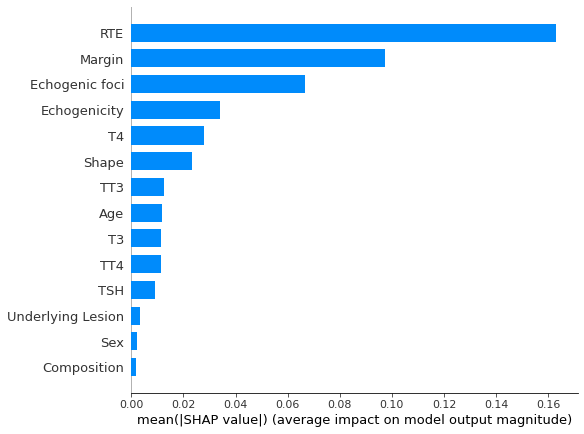

In [7]:
shap.summary_plot(shap_values[1], xtrain, plot_type="bar")

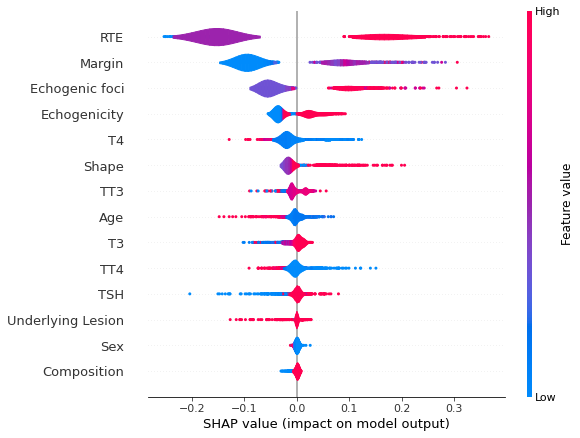

In [8]:
shap.summary_plot(shap_values[1], xtrain, plot_type="violin")

In [9]:
shap.force_plot(expected_value[1], shap_values[1],xtrain)

In [10]:
# Testing the model on the internal validation set
mlperformance(rf, xtrainup, ytrainup, xtest, ytest)

auc =  0.932
accuracy =  87.5
------------------------
混淆矩阵为：
[[576  90]
 [ 26 238]]
tn= 576
fp= 90
fn= 26
tp= 238
------------------------
PPV = 72.6
(238/328)
NPV = 95.7
(576/602)
sensitivity = 90.2
(238/264)
specificity = 86.5
(576/666)


In [11]:
# Calculate SHAP values to understand the detailed diagnostic basis of the model
shap.initjs()
explainer=shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtest)
expected_value= explainer.expected_value

In [12]:
shap.force_plot(expected_value[1], shap_values[1], xtest)